In [1]:
import numpy as np
import matplotlib.pyplot as plt
import halotools.mock_observables
import illustris_python.groupcat as gc

%matplotlib inline

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
MEDIUM_SIZE = 30
SMALL_SIZE = 22
SSSMALL_SIZE = 16

plt.rc('font', size=SSSMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE) 

In [23]:
def compute_correlation_func(log10_stellar_mass, ssfr, positions, min_mass=10.0, max_mass=10.5):
    ii = (log10_stellar_mass>min_mass) & (log10_stellar_mass < max_mass)
    all_pos = positions[ii,:]
    all_ssfr = ssfr[ii]
    percentiles = np.percentile(all_ssfr, [25,75])
    ii_early = all_ssfr <= percentiles[0]
    ii_late  = all_ssfr > percentiles[1]
    
    ii_sorted = np.argsort(all_ssfr)
    n_items = len(ii_sorted)
    ii_late = ii_sorted[-n_items//4:]
    ii_early = ii_sorted[:n_items//4]
    print('EARLY', np.count_nonzero(ii_early))
    print('LATE', np.count_nonzero(ii_early))
    early_pos = all_pos[ii_early,:]
    late_pos = all_pos[ii_late, :]
    all_corr = {}
    r = np.linspace(5000.0, 10000.0,10)
    all_corr['early'] = halotools.mock_observables.tpcf(early_pos, r, period=205000.0, estimator='Landy-Szalay')
    all_corr['late'] = halotools.mock_observables.tpcf(late_pos, r, period=205000.0, estimator='Landy-Szalay')
    all_corr['all'] = halotools.mock_observables.tpcf(all_pos, r, period=205000.0, estimator='Landy-Szalay')
    all_corr['r'] = 0.5*(r[1:]+r[:-1])
    return all_corr

def compute_ratio(log10_stellar_mass, formation_times, positions):
    log_mass_bins = np.arange(9.0, 11.5, 0.25)
    ratio_late_mean = np.ones(len(log_mass_bins))
    ratio_late_std = ratio_late_mean.copy()
    ratio_early_mean = ratio_late_mean.copy()
    ratio_early_std = ratio_late_mean.copy()

    for i, min_mass_bin in enumerate(log_mass_bins):
        corr = compute_correlation_func(log10_stellar_mass, formation_times, positions, min_mass=min_mass_bin, max_mass=min_mass_bin+0.5)
        ratio_late_mean[i] = np.mean(corr['late']/corr['all'])
        ratio_late_std[i] = np.std(corr['late']/corr['all'])
        ratio_early_mean[i] = np.mean(corr['early']/corr['all'])
        ratio_early_std[i] = np.std(corr['early']/corr['all'])
    return {'log_mass_bins':log_mass_bins, 
            'ratio_late_mean':ratio_late_mean, 'ratio_late_std':ratio_late_std,
            'ratio_early_mean':ratio_early_mean, 'ratio_early_std':ratio_early_std}

def compute_median_assembly(log10_stellar_mass, formation_times):
    log_mass_bins = np.arange(9.0, 11.5, 0.25)
    median_assembly = np.ones(len(log_mass_bins))

    for i, min_mass_bin in enumerate(log_mass_bins):
        ii = (log10_stellar_mass>min_mass_bin) & (log10_stellar_mass < (min_mass_bin+0.5))
        median_assembly[i] = np.median(formation_times[ii])

    return {'log_mass_bins':log_mass_bins, 'median_assembly': median_assembly}

In [3]:
basePath = "/Users/forero/Illustris_data/TNG300-1/"
subhalo_fields = ['SubhaloMass','SubhaloPos','SubhaloSFRinRad', 'SubhaloVmax','SubhaloMassType','SubhaloVmaxRad',
                  'SubhaloParent', 'SubhaloGrNr', 'SubhaloStellarPhotometrics', 'SubhaloMassInRadType']
subhalos = gc.loadSubhalos(basePath,99, fields=subhalo_fields)
header = gc.loadHeader(basePath,99)
BoxSize = header['BoxSize']

In [24]:
formation_data = np.loadtxt("/Users/forero/Illustris_data/formation_times_TNG300/301/Galaxies/Central_Galaxies/Central_Galaxies.dat")
log10_stellar_mass  = np.log10(formation_data[:,4]) + 10
gal_id = np.int_(formation_data[:,1])
positions = formation_data[:, 5:]
formation_times = formation_data[:, 3]
ssfr = subhalos['SubhaloSFRinRad'][gal_id]/subhalos['SubhaloMassInRadType'][gal_id, 4]
ratio_central = compute_ratio(log10_stellar_mass, ssfr, positions)
median_central = compute_median_assembly(log10_stellar_mass, formation_times)

EARLY 12392
LATE 12392
EARLY 10857
LATE 10857
EARLY 9454
LATE 9454
EARLY 8523
LATE 8523
EARLY 7491
LATE 7491
EARLY 4846
LATE 4846
EARLY 2178
LATE 2178
EARLY 983
LATE 983
EARLY 458
LATE 458
EARLY 207
LATE 207


In [25]:
formation_data = np.loadtxt("/Users/forero/Illustris_data/formation_times_TNG300/301/Galaxies/All_Galaxies/ZM_Galaxies3001.dat")
log10_stellar_mass  = np.log10(formation_data[:,4]) + 10
positions = formation_data[:, 5:]
formation_times = formation_data[:, 3]
gal_id = np.int_(formation_data[:,1])
ssfr = subhalos['SubhaloSFRinRad'][gal_id]/subhalos['SubhaloMassInRadType'][gal_id, 4]
ratio_all = compute_ratio(log10_stellar_mass, ssfr, positions)
median_all = compute_median_assembly(log10_stellar_mass, formation_times)

EARLY 22145
LATE 22145
EARLY 19197
LATE 19197
EARLY 16341
LATE 16341
EARLY 14309
LATE 14309
EARLY 12228
LATE 12228
EARLY 7577
LATE 7577
EARLY 3122
LATE 3122
EARLY 1297
LATE 1297
EARLY 561
LATE 561
EARLY 236
LATE 236


In [26]:
formation_data = np.loadtxt("/Users/forero/Illustris_data/formation_times_TNG300/301/Galaxies/Satellite_Galaxies/SatZ_Galaxies.dat")
log10_stellar_mass  = np.log10(formation_data[:,4]) + 10
positions = formation_data[:, 5:]
formation_times = formation_data[:, 3]
gal_id = np.int_(formation_data[:,1])
ssfr = subhalos['SubhaloSFRinRad'][gal_id]/subhalos['SubhaloMassInRadType'][gal_id, 4]
ratio_sat = compute_ratio(log10_stellar_mass, ssfr, positions)
median_sat = compute_median_assembly(log10_stellar_mass, formation_times)

EARLY 9753
LATE 9753
EARLY 8340
LATE 8340
EARLY 6886
LATE 6886
EARLY 5785
LATE 5785
EARLY 4735
LATE 4735
EARLY 2730
LATE 2730
EARLY 944
LATE 944
EARLY 314
LATE 314
EARLY 102
LATE 102
EARLY 28
LATE 28


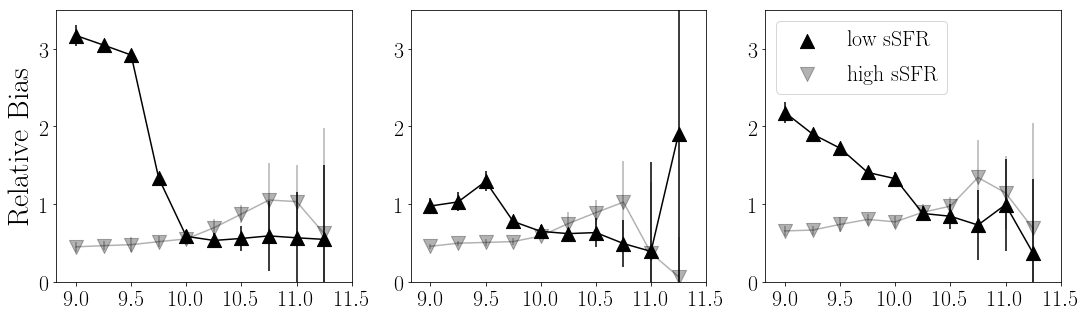

In [27]:
plt.figure(figsize=(18,5))
plt.subplot(1,3,1)
plt.scatter(ratio_all['log_mass_bins'], ratio_all['ratio_early_mean'], marker='^', s=200, color='black', label='Early assembly')
plt.errorbar(ratio_all['log_mass_bins'], ratio_all['ratio_early_mean'], ratio_central['ratio_early_std'], color='black')
plt.scatter(ratio_all['log_mass_bins'], ratio_all['ratio_late_mean'], marker='v', s=200, color='black', alpha=0.3, label='Late assembly')
plt.errorbar(ratio_all['log_mass_bins'], ratio_all['ratio_late_mean'], ratio_central['ratio_late_std'], color='black', alpha=0.3)

#plt.title('All Galaxies')
plt.ylim([0.0, 3.5])
#plt.xlabel("$\log_{10}\ M_{\mathrm{\star}} / M_{\odot}\ h^{-1}$")
plt.ylabel("Relative Bias")
plt.xticks(np.arange(9.0, 12.0, 0.5))


plt.subplot(1,3,2)
plt.scatter(ratio_sat['log_mass_bins'], ratio_sat['ratio_early_mean'], marker='^', s=200, color='black')
plt.errorbar(ratio_sat['log_mass_bins'], ratio_sat['ratio_early_mean'], ratio_sat['ratio_early_std'], color='black')
plt.scatter(ratio_sat['log_mass_bins'], ratio_sat['ratio_late_mean'], marker='v', s=200, color='black', alpha=0.3)
plt.errorbar(ratio_sat['log_mass_bins'], ratio_sat['ratio_late_mean'], ratio_sat['ratio_late_std'], color='black', alpha=0.3)

#plt.title('Satellite Galaxies')
plt.ylim([0.0, 3.5])
#plt.xlabel("$\log_{10}\ M_{\mathrm{\star}} / M_{\odot}\ h^{-1}$")
plt.xticks(np.arange(9.0, 12.0, 0.5))


plt.subplot(1,3,3)
plt.scatter(ratio_central['log_mass_bins'], ratio_central['ratio_early_mean'], marker='^', s=200, color='black', label='low sSFR')
plt.errorbar(ratio_central['log_mass_bins'], ratio_central['ratio_early_mean'], ratio_central['ratio_early_std'], color='black')
plt.scatter(ratio_central['log_mass_bins'], ratio_central['ratio_late_mean'], marker='v', s=200, color='black', alpha=0.3, label='high sSFR')
plt.errorbar(ratio_central['log_mass_bins'], ratio_central['ratio_late_mean'], ratio_central['ratio_late_std'], color='black', alpha=0.3)

#plt.title('Central Galaxies')
plt.ylim([0.0, 3.5])
plt.legend(fontsize=SMALL_SIZE, loc=2)
#plt.xlabel("$\log_{10}\ M_{\mathrm{\star}} / M_{\odot}\ h^{-1}$")
plt.xticks(np.arange(9.0, 12.0, 0.5))

plt.savefig("ssfr_bias_galaxies.pdf", bbox_inches='tight')

In [28]:
formation_data = np.loadtxt("/Users/forero/Illustris_data/formation_times_TNG300/301/Galaxies/All_Galaxies/ZM_Galaxies3001.dat")
log10_stellar_mass  = np.log10(formation_data[:,4]) + 10
positions = formation_data[:, 5:]
formation_times = formation_data[:, 3]
gal_id = np.int_(formation_data[:,1])
ssfr = subhalos['SubhaloSFRinRad'][gal_id]/subhalos['SubhaloMassInRadType'][gal_id, 4]


min_mass = 10.0
max_mass = 10.25

ii = (log10_stellar_mass>min_mass) & (log10_stellar_mass < max_mass)
all_pos = positions[ii,:]
all_ssfr = ssfr[ii]
ii_sorted = np.argsort(all_ssfr)
n_items = len(ii_sorted)
ii_late = ii_sorted[-n_items//4:]
ii_early = ii_sorted[:n_items//4]
early_pos = all_pos[ii_early,:]
late_pos = all_pos[ii_late, :]

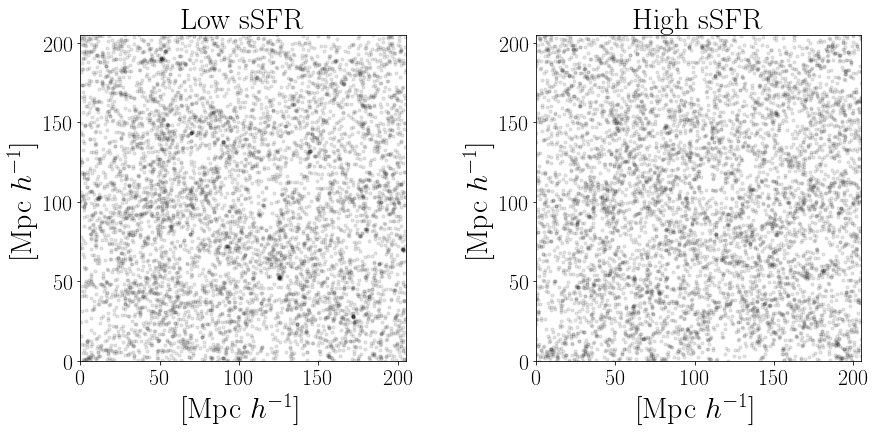

In [29]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
ii_z = early_pos[:,2]<210000
plt.scatter(early_pos[ii_z,0]/1000, early_pos[ii_z,1]/1000, s=10.0, alpha=0.1, color='black')
plt.title('Low sSFR'.format(int(np.count_nonzero(ii_z)/1000)))
plt.axis('equal')
plt.xlim([0,205])
plt.ylim([0,205])
plt.xlabel("[Mpc $h^{-1}]$")
plt.ylabel("[Mpc $h^{-1}]$")
_ = plt.xticks(np.arange(0,250,50))


plt.subplot(1,2,2)
ii_z = late_pos[:,2]<210000
plt.scatter(late_pos[ii_z,0]/1000, late_pos[ii_z,1]/1000, s=10.0, alpha=0.1, color='black')
plt.title('High sSFR'.format(int(np.count_nonzero(ii_z)/1000)))
plt.axis('equal')
plt.xlim([0,205])
plt.ylim([0,205])
plt.xlabel("[Mpc $h^{-1}]$")
plt.ylabel("[Mpc $h^{-1}]$")
_ = plt.xticks(np.arange(0,250,50))

plt.subplots_adjust(wspace=0.4)
plt.savefig("scatter_ssfr.pdf", bbox_inches='tight')

In [12]:
print(len(late_pos[ii_z,1]))

6868
